In [ ]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from scipy.optimize import brute, fmin
from scipy.integrate import quad
import yfinance as yf
import pandas_datareader as pdr  # Access FRED
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# **Issue 1: Optimizing hyperparameters**

---








** Code exaple for ...**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [ ]:
#Loading the Credit Card Default dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(url, header=1)

features = df.columns[1:-1]
X = df[features]
y = df['default payment next month']
df

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
svm = SVC()
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm)
])

#Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [ ]:
y_pred = pipeline.predict(X_test)

#Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8184444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.33      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



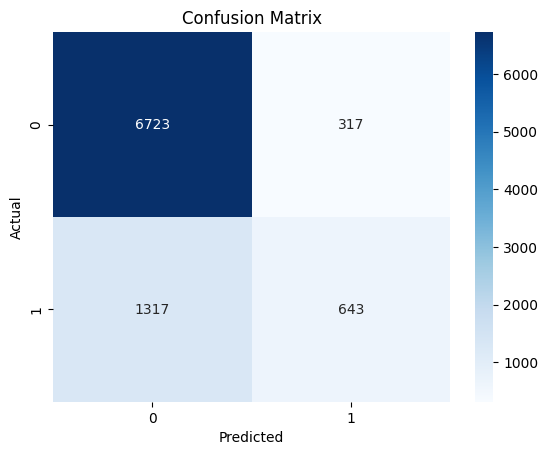

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

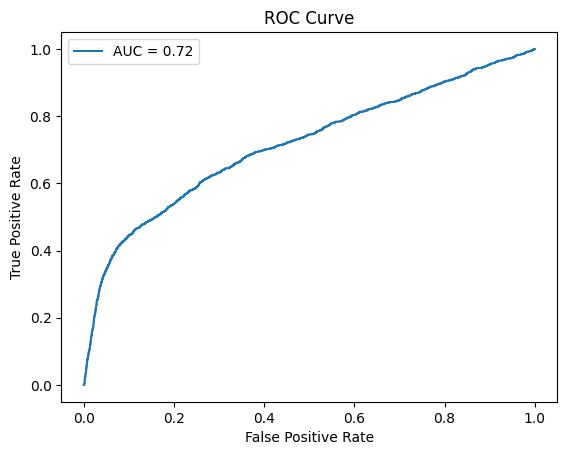

In [ ]:
y_prob = pipeline.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Issue 2: Optimizing the Bias-Variance Tradeoff**


In [ ]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

# load dataset: boston housing (https://github.com/jbrownlee/Datasets/blob/master/housing.names)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]


X = X[:,5].reshape(-1, 1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

degrees = [0,1,2,3,4]

mse_all = []
bias_all = []
var_all = []
for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())

#clf = svm.SVR(kernel='linear')

    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)

    mse_all.append(mse)
    bias_all.append(bias)
    var_all.append(var)

mse_all = np.array(mse_all)
bias_all = np.array(bias_all)
var_all = np.array(var_all)


Text(0, 0.5, 'House price (in $10000)')

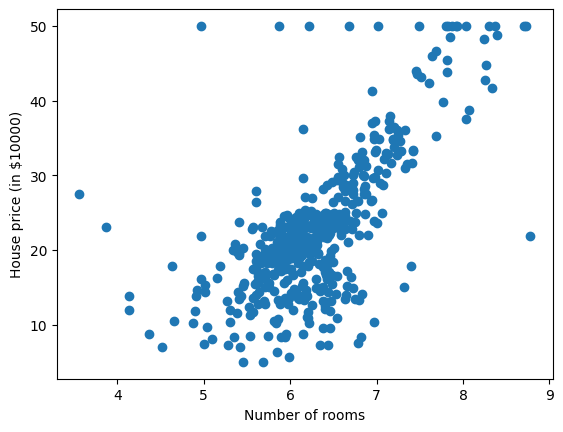

In [ ]:
plt.scatter(X, y)
plt.xlabel('Number of rooms')
plt.ylabel('House price (in $10000)')

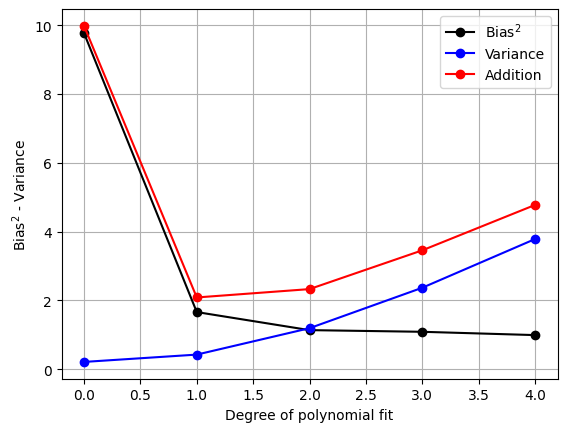

In [ ]:
plt.figure()
plt.plot(degrees, bias_all**2/1000, '-ok', label=r'Bias$^2$')
plt.plot(degrees, var_all, '-ob', label=r'Variance')
plt.plot(degrees, bias_all**2/1000+var_all, '-or', label=r'Addition')
plt.xlabel('Degree of polynomial fit')
plt.ylabel(r'Bias$^2$ - Variance')
plt.grid()
plt.legend(loc='best')
#plt.ylim(0,1e5)

# **Issue 3: Applying Ensemble Learning- Bagging, Boosting or Stacking**


In [ ]:
# Define the tickers
tickers = {
    "S&P 500": "^GSPC",
    "Gold": "GC=F",
    "Bitcoin": "BTC-USD",
    "Silver": "SI=F",
    "EURUSD": "EURUSD=X"
}

# Define the period and interval
period = "5y"  # 10 year of data
interval = "1d"  # daily data

# Download the data
data = {}
for name, ticker in tickers.items():
    data[name] = yf.download(ticker, period=period, interval=interval)

# Combine the data into a single DataFrame
combined_data = pd.DataFrame({
    "Bitcoin": data["Bitcoin"]["Close"],
    "S&P 500": data["S&P 500"]["Close"],
    "Gold": data["Gold"]["Close"],
    "Silver": data["Silver"]["Close"],
    "EURUSD": data["EURUSD"]["Close"]
})

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Display the first few rows of the combined DataFrame
combined_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Bitcoin,S&P 500,Gold,Silver,EURUSD
Date,,,,,
2019-07-16,9477.641602,3004.040039,1409.199951,15.600000,1.126177
2019-07-17,9693.802734,2984.419922,1421.300049,15.893000,1.121227
2019-07-18,10666.482422,2995.110107,1426.099976,16.120001,1.122965
2019-07-19,10530.732422,2976.610107,1425.099976,16.117001,1.126152
2019-07-22,10343.106445,2985.030029,1425.300049,16.340000,1.121831


In [ ]:
### Separate Dataset into two, one is testing dataset, the other is the training dataset
train_data, test_data = train_test_split(combined_data, test_size=0.2, shuffle=False)

print("The training dataset is:", len(train_data), ", and the testing dataset is:",len(test_data))

The training dataset is: 1004 , and the testing dataset is: 252


In [ ]:
# Use S&P 500, Gold, Silver and EURUSD to predict the Bitcoin price
# Separate features and target variable
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

X_train = train_data.drop("Bitcoin", axis=1)
y_train = train_data["Bitcoin"]
X_test = test_data.drop("Bitcoin", axis=1)
y_test = test_data["Bitcoin"]

def create_model_machine_learning():
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
    return model

# Define model creation function
def create_model_neural_network():
    tf.random.set_seed(46)  # Set random seed for reproducibility
    model = Sequential([Dense(1, input_shape=(X_train.shape[1],))])
    model.compile(
        loss='mae',  # Mean Absolute Error (MAE) as the loss function
        optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD optimizer with momentum
        metrics=['mae']  # Performance metric is MAE
    )
    return model

# Instantiate models
models = [create_model_machine_learning(),create_model_neural_network()]

In [ ]:
# Train models
for model in models:
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate individual models
for i, model in enumerate(models):
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Model Test MAE: {score[1]:.4f}')  # Access the MAE metric directly

# Ensemble prediction by averaging
predictions = [model.predict(X_test) for model in models]
ensemble_predictions = np.mean(predictions, axis=0)
ensemble_mae = np.mean(np.abs(ensemble_predictions - y_test.values.reshape(-1, 1)))

print(f'Ensemble Test MAE: {ensemble_mae:.4f}')

Epoch 1/50
51/51 [==============================] - 0s 4ms/step - loss: 96951000.0000 - mae: 7664.8589 - val_loss: 96318736.0000 - val_mae: 8426.9229
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 96411104.0000 - mae: 7609.5435 - val_loss: 89521768.0000 - val_mae: 8147.3271
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 95980264.0000 - mae: 7620.2012 - val_loss: 66947516.0000 - val_mae: 7130.6748
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 95604464.0000 - mae: 7607.7622 - val_loss: 109640064.0000 - val_mae: 8980.3965
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 96690464.0000 - mae: 7664.9756 - val_loss: 77989088.0000 - val_mae: 7650.7480
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 95742824.0000 - mae: 7628.5244 - val_loss: 101820352.0000 - val_mae: 8654.7617
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 96140496.0000 - mae: 7611.

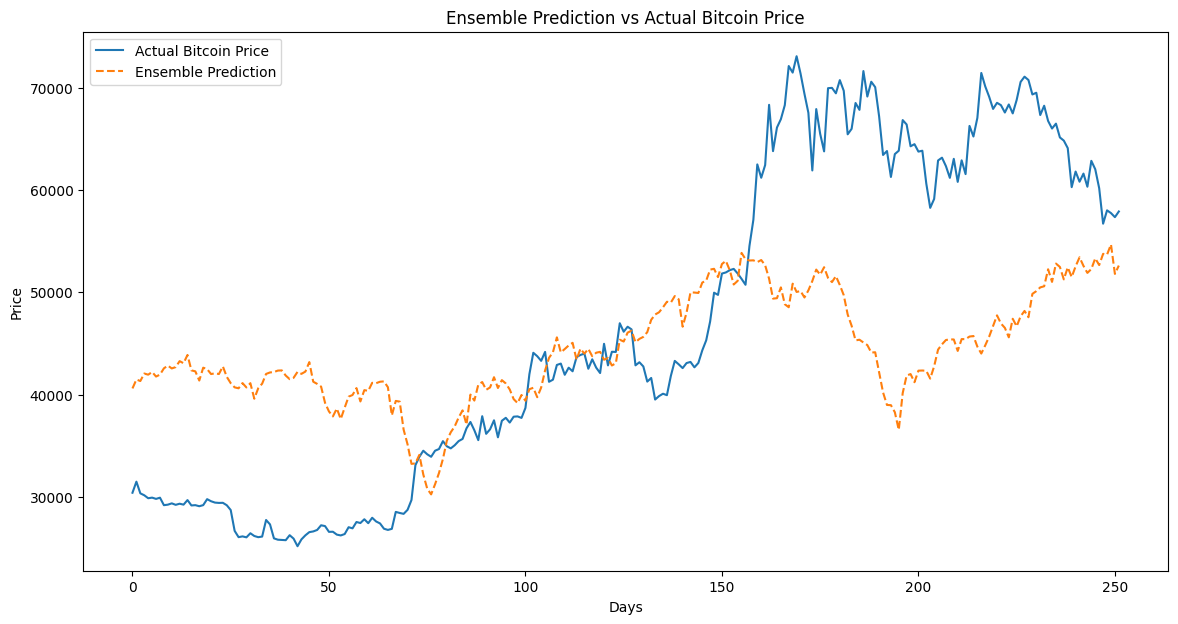

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Bitcoin Price')
plt.plot(ensemble_predictions, label='Ensemble Prediction', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Ensemble Prediction vs Actual Bitcoin Price')
plt.legend()
plt.show()